<div style="text-align: center; padding: 20px; background-color: #000000; border-radius: 10px; margin: 20px 0;">
    <h1 style="color: #008080 	;">Compas Analysis<h1>
    <h2 style="color: #008080 	;">Defendant Risk Assessment Dataset<h2>
    <hr style="border: 2px solid #008080;">
</div>

Correctional Offender Management Profiling for Alternative Sanctions (COMPAS) is a popular commercial algorithm used by judges and parole officers for scoring criminal defendant’s likelihood of re-offending (recidivism). The algorithm uses a variety of factors to determine whether a defendant presents a high, medium, or low risk of committing another crime. In this project, we will analyze the results of the algorithm and explore its fairness and accuracy.

### Importing libraries

In [758]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Loading data

In [759]:
DATA_PATH = "compas.csv"

In [760]:
compas_df = pd.read_csv(DATA_PATH)
pd.set_option('display.max_columns', None)

### Brief look at the data

In [761]:
display(compas_df)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
2,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,0
3,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0
4,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,0,1,0,0,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,13022355MM10A,2013-11-30,NaN,0.0,M,Battery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-11-30,Risk of Violence,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,10995,raheem smith,raheem,smith,2013-10-20,Male,1995-06-28,20,Less than 25,African-American,0,9,0,0,0,-1.0,2013-10-19 11:17:15,2013-10-20 08:13:06,13014650CF10A,2013-10-19,NaN,1.0,F,Possession of Cocaine,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,9,High,2013-10-20,Risk of Violence,9,High,2013-10-20,2014-04-07,2014-04-27,0,0,169,0,0,0
4739,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,0,7,0,0,0,-1.0,2013-11-22 05:18:27,2013-11-24 02:59:20,13016249CF10A,2013-11-22,NaN,1.0,F,Deliver Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,7,Medium,2013-11-23,Risk of Violence,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0,0
4740,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,0,3,0,0,0,-1.0,2014-01-31 07:13:54,2014-02-02 04:03:52,14001422CF10A,2014-01-31,NaN,1.0,F,Leaving the Scene of Accident,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,3,Low,2014-02-01,Risk of Violence,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0,0
4741,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,0,1,0,0,0,-1.0,2014-01-13 05:48:01,2014-01-14 07:49:46,14000581CF10A,2014-01-13,NaN,1.0,F,Aggravated Ba

In [762]:
compas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4743 non-null   int64  
 1   name                     4743 non-null   object 
 2   first                    4743 non-null   object 
 3   last                     4743 non-null   object 
 4   compas_screening_date    4743 non-null   object 
 5   sex                      4743 non-null   object 
 6   dob                      4743 non-null   object 
 7   age                      4743 non-null   int64  
 8   age_cat                  4743 non-null   object 
 9   race                     4743 non-null   object 
 10  juv_fel_count            4743 non-null   int64  
 11  decile_score             4743 non-null   int64  
 12  juv_misd_count           4743 non-null   int64  
 13  juv_other_count          4743 non-null   int64  
 14  priors_count            

In [763]:
compas_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4743.0,5454.230445,3189.515451,1.0,2631.0,5475.0,8239.5,11000.0
age,4743.0,36.002952,12.200715,18.0,26.0,33.0,44.0,83.0
juv_fel_count,4743.0,0.045330,0.420694,0.0,0.0,0.0,0.0,20.0
decile_score,4743.0,3.978073,2.749706,-1.0,1.0,3.0,6.0,10.0
juv_misd_count,4743.0,0.070841,0.406142,0.0,0.0,0.0,0.0,8.0
juv_other_count,4743.0,0.080751,0.468779,0.0,0.0,0.0,0.0,17.0
priors_count,4743.0,2.677209,4.084277,0.0,0.0,1.0,3.0,38.0
days_b_screening_arrest,4475.0,2.723799,78.074361,-345.0,-1.0,-1.0,-1.0,1057.0
c_days_from_compas,4732.0,72.691251,385.694476,0.0,1.0,1.0,2.0,9485.0
is_recid,4743.0,0.209783,0.407196,0.0,0.0,0.0,0.0,1.0


In [764]:
compas_df.describe(include=["object","category"]).T

,count,unique,top,freq
name,4743,4721,jeffrey jackson,2
first,4743,2114,michael,95
last,4743,2897,williams,49
compas_screening_date,4743,586,2013-09-23,24
sex,4743,2,Male,3746
dob,4743,3978,1990-06-21,4
age_cat,4743,3,25 - 45,2699
race,4743,6,African-American,2266
c_jail_in,4475,4475,2013-08-13 06:03:42,1
c_jail_out,4475,4466,2013-09-28 02:10:00,3


<p style="color:#cc0066; font-size:30px;">Preprocessing the data</p>

In [765]:
num_duplicates = compas_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [766]:
duplicated_cols = compas_df.columns[compas_df.T.duplicated(keep='first')].tolist()
print(f"Duplicate columns:\n")
print(duplicated_cols)

Duplicate columns:

['decile_score.1', 'screening_date', 'v_screening_date', 'priors_count.1', 'two_year_recid.1']


In [767]:
compas_df = compas_df.drop(duplicated_cols, axis=1)

### Handle Missing Values

In [768]:
null_percentage = (compas_df.isna().sum() / len(compas_df)) * 100
print("Null Percentage:\n")
print(null_percentage)

Null Percentage:

id                           0.000000
name                         0.000000
first                        0.000000
last                         0.000000
compas_screening_date        0.000000
sex                          0.000000
dob                          0.000000
age                          0.000000
age_cat                      0.000000
race                         0.000000
juv_fel_count                0.000000
decile_score                 0.000000
juv_misd_count               0.000000
juv_other_count              0.000000
priors_count                 0.000000
days_b_screening_arrest      5.650432
c_jail_in                    5.650432
c_jail_out                   5.650432
c_case_number                0.231921
c_offense_date              16.255534
c_arrest_date               83.976386
c_days_from_compas           0.231921
c_charge_degree              0.000000
c_charge_desc                0.358423
is_recid                     0.000000
r_case_number               79.0

In [769]:
cols_to_remove = null_percentage[null_percentage > 60].index
compas_df = compas_df.drop(cols_to_remove, axis=1)

### Removing extra features

In [770]:
cols_to_remove = ['type_of_assessment', 'v_type_of_assessment']
compas_df = compas_df.drop(cols_to_remove, axis=1)

In [771]:
cols_to_remove = ['name', 'first', 'last', 'c_case_number']
compas_df = compas_df.drop(cols_to_remove, axis=1)

In [772]:
num_rows_with_null = compas_df.isnull().any(axis=1).sum()
print(f"Number of rows with null values: {num_rows_with_null}\n")

null_cols = compas_df.isnull().sum()
null_cols = null_cols[null_cols > 0]
null_cols = null_cols.sort_values(ascending=False)

null_cols_df = pd.DataFrame(null_cols, columns=['Null Values'])
null_cols_df.index.name = 'Column'

print("Columns with Null Values (sorted by number of nulls):")
print(null_cols_df.to_string())


Number of rows with null values: 959

Columns with Null Values (sorted by number of nulls):
                         Null Values
Column                              
c_offense_date                   771
days_b_screening_arrest          268
c_jail_in                        268
c_jail_out                       268
in_custody                       209
out_custody                      209
c_charge_desc                     17
c_days_from_compas                11
score_text                         5


In [773]:
# print unique values for each column with null values
for col in null_cols.index:
		unique_values = compas_df[col].unique()
		print(f"\n{col} unique values:")
		print(unique_values)


c_offense_date unique values:
['2013-08-13' '2013-01-26' '2013-01-12' nan '2013-11-30' '2014-03-15'
 '2012-12-31' '2013-11-25' '2013-01-01' '2013-10-08' '2014-03-24'
 '2013-12-21' '2013-11-16' '2013-11-20' '2013-01-24' '2013-05-10'
 '2013-05-05' '2014-10-23' '2012-03-23' '2013-01-15' '2013-02-27'
 '2013-02-13' '2014-03-27' '2014-05-18' '2013-08-02' '2013-04-23'
 '2013-11-17' '2013-03-17' '2013-01-20' '2013-08-26' '2013-02-10'
 '2013-01-07' '2014-03-08' '2013-09-27' '2013-05-24' '2013-02-18'
 '2013-11-07' '2014-06-07' '2013-03-03' '2013-02-20' '2013-10-02'
 '2014-12-12' '2010-10-23' '2013-11-13' '2013-09-03' '2013-04-14'
 '2013-08-18' '2014-11-04' '2013-09-08' '2013-09-04' '2013-08-28'
 '2014-02-20' '2013-02-25' '2013-07-16' '2013-02-15' '2013-11-18'
 '2013-10-13' '2013-10-28' '2013-07-27' '2014-02-11' '2013-09-12'
 '2013-10-30' '2013-05-22' '2014-02-06' '2014-02-27' '2013-01-16'
 '2013-05-14' '2014-12-17' '2013-12-25' '2013-12-06' '2014-01-25'
 '2013-09-05' '2012-10-30' '2013-05-06' '

Given the high number of unique values in the columns with null values, filling the nulls with the mode, mean, or using machine learning methods is impractical. Therefore, we will remove these columns entirely to ensure data integrity and simplify the dataset.

In [774]:
compas_df.dropna(inplace=True)

Now we remove rows that meet the following criteria:
- If the charge date of a defendants Compas scored crime was not within 30 days from when the person was arrested, we assume that because of data quality reasons, that we do not have the right offense.
- We coded the recidivist flag -- is_recid -- to be -1 if we could not find a compas case at all.
- In a similar vein, ordinary traffic offenses -- those with a `c_charge_degree` of 'O' -- will not result in Jail time are removed (only two of them).

In [775]:
rows_count = len(compas_df)
print(f"Number of rows: {rows_count}")

# remove rows where c_charge_degree is 'O'
compas_df = compas_df[compas_df.c_charge_degree != 'O']
print(f"Number of rows after removing c_charge_degree 'O': {len(compas_df)}")

# remove rows days_b_screening_arrest is less than 30 or greater than 30
compas_df = compas_df[(compas_df.days_b_screening_arrest >= -30) & (compas_df.days_b_screening_arrest <= 30)]
print(f"Number of rows after removing days_b_screening_arrest outliers: {len(compas_df)}")

# remove rows where score_text is 'N/A'
compas_df = compas_df[compas_df.score_text != 'N/A']
print(f"Number of rows after removing score_text 'N/A': {len(compas_df)}")


# remove rows where two_year_recid is -1
compas_df = compas_df[compas_df.two_year_recid != -1]
print(f"Number of rows after removing two_year_recid -1: {len(compas_df)}")


Number of rows: 3784
Number of rows after removing c_charge_degree 'O': 3784
Number of rows after removing days_b_screening_arrest outliers: 3490
Number of rows after removing score_text 'N/A': 3490
Number of rows after removing two_year_recid -1: 3490


<!-- Feature Engineering and Selection -->
<p style="color:#cc0066; font-size:30px;">Feature Engineering and Selection</p>

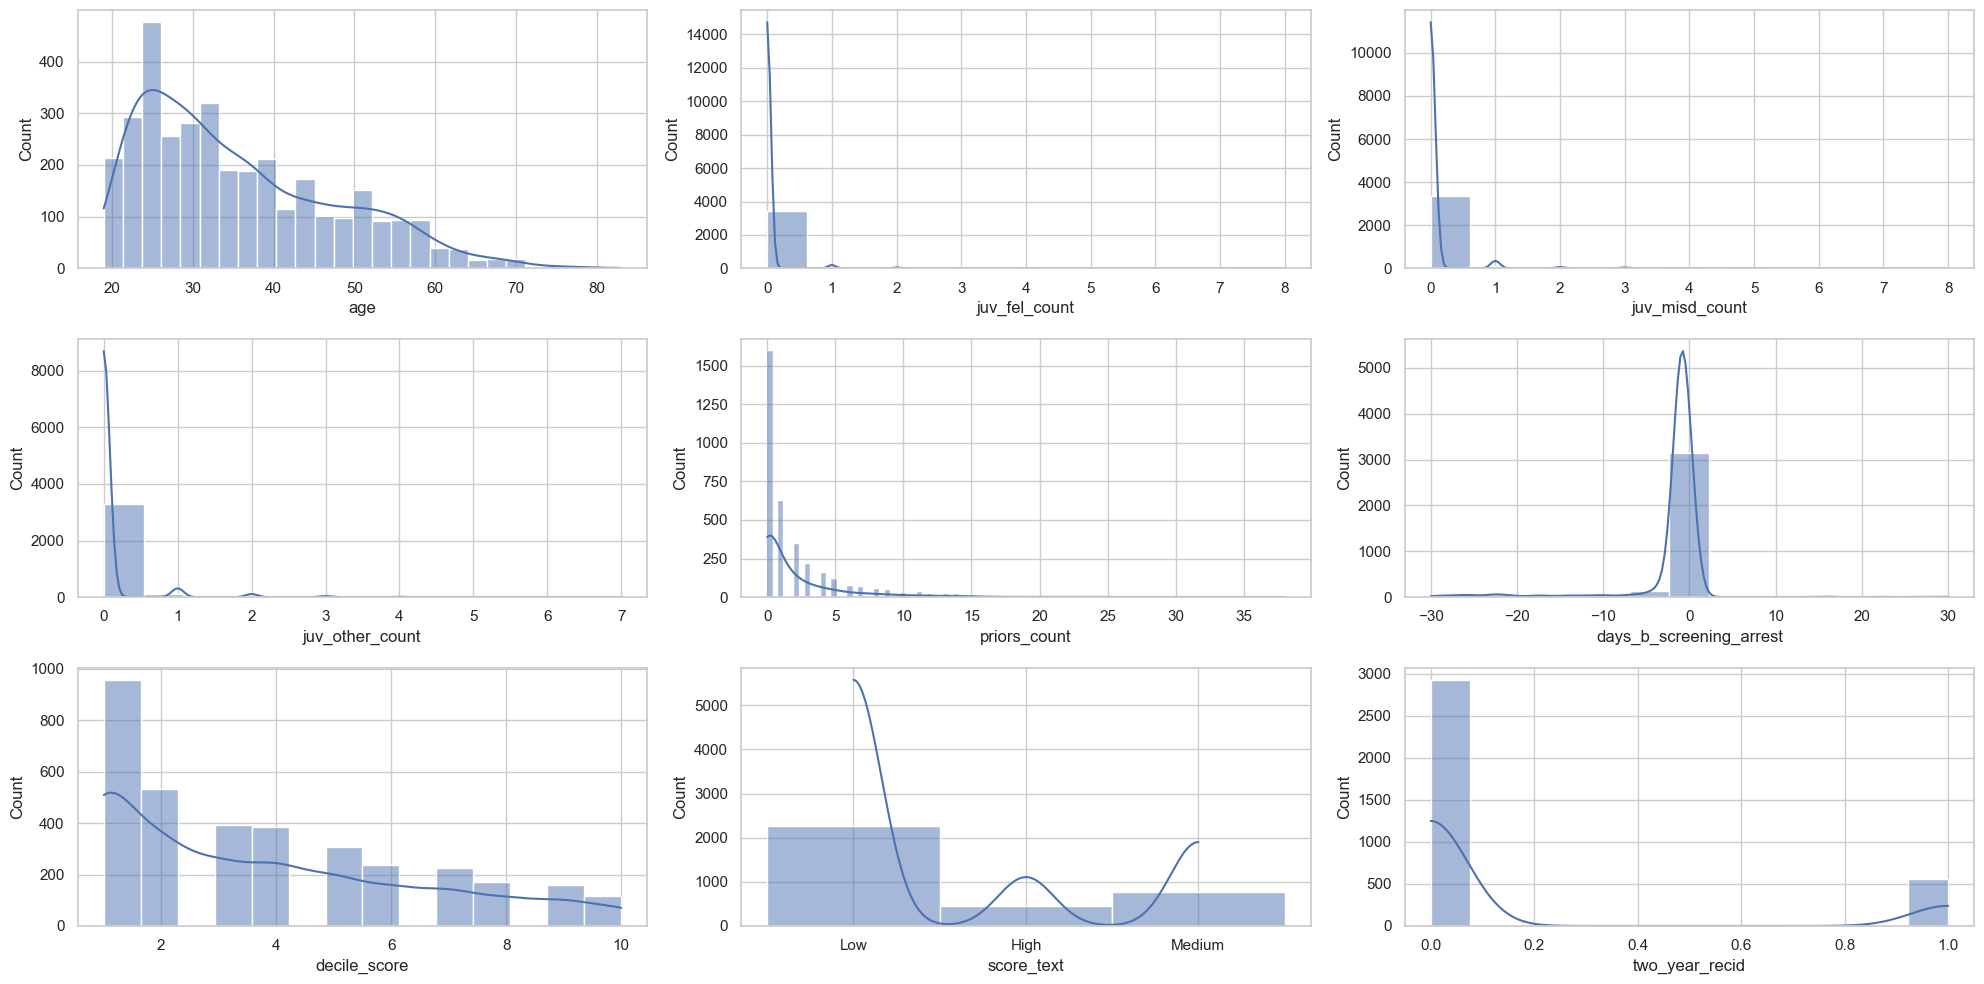

In [776]:
# plot feature distributions
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

sns.histplot(compas_df, x="age", kde=True, ax=axes[0, 0])
sns.histplot(compas_df, x="juv_fel_count", kde=True, ax=axes[0, 1])
sns.histplot(compas_df, x="juv_misd_count", kde=True, ax=axes[0, 2])
sns.histplot(compas_df, x="juv_other_count", kde=True, ax=axes[1, 0])
sns.histplot(compas_df, x="priors_count", kde=True, ax=axes[1, 1])
sns.histplot(compas_df, x="days_b_screening_arrest", kde=True, ax=axes[1, 2])
sns.histplot(compas_df, x="decile_score", kde=True, ax=axes[2, 0])
sns.histplot(compas_df, x="score_text", kde=True, ax=axes[2, 1])
sns.histplot(compas_df, x="two_year_recid", kde=True, ax=axes[2, 2])

plt.tight_layout()
plt.show()

In [777]:
# Calculate race percentages
race_counts = compas_df['race'].value_counts()
row_count = compas_df['race'].count()
race_percentages = (race_counts / row_count * 100).round(3)

# Print unique races
print("Unique races:", compas_df['race'].unique())

# Display race percentages in a table format
print("\nRace Percentages:")
race_percentages_df = pd.DataFrame(race_percentages).reset_index()
race_percentages_df.columns = ['Race', 'Percentage']
print(race_percentages_df.to_string(index=False, float_format="{:.3f}".format))


Unique races: ['Other' 'African-American' 'Caucasian' 'Hispanic' 'Asian'
 'Native American']

Race Percentages:
            Race  Percentage
African-American      46.418
       Caucasian      37.049
        Hispanic       9.284
           Other       6.390
           Asian       0.688
 Native American       0.172


Judges are often presented with two sets of scores from the Compas system -- one that classifies people into High, Medium and Low risk, and a corresponding decile score. There is a clear downward trend in the decile scores as those scores increase for white defendants.

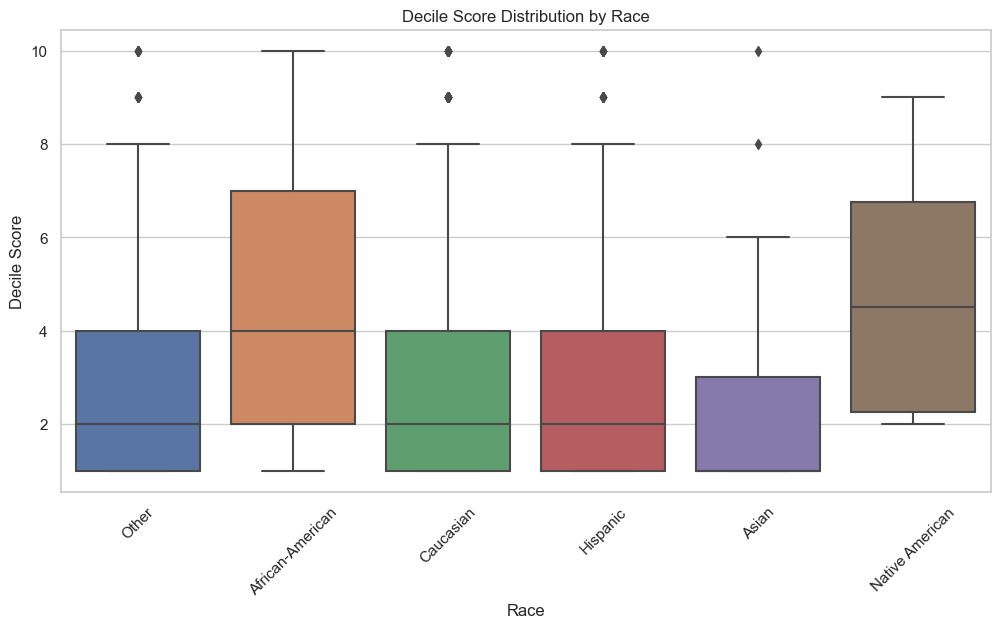

In [778]:
races = ['Other', 'African-American', 'Caucasian', 'Hispanic', 'Asian', 'Native American']

# Filter the DataFrame to include only the specified races
filtered_df = compas_df[compas_df['race'].isin(races)]

# Plot the decile_score for each race
plt.figure(figsize=(12, 6))
sns.boxplot(x='race', y='decile_score', data=filtered_df, order=races)
plt.title('Decile Score Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Decile Score')
plt.xticks(rotation=45)
plt.show()

As we can see, there is a racial bias in the decile_score. But we decided **not** to remove `race` from the dataset.

Now we select the features that we will use to train our model. This is done by removing the columns that are not relevant to the model and adding features that can help improve the model's performance.

#### Calculating `criminal history` and `Juvenile criminal history`

In [779]:
criminal_history_cols = ['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']
juv_criminal_history_cols = ['juv_fel_count', 'juv_misd_count', 'juv_other_count']


compas_df['criminal_history'] = compas_df[criminal_history_cols].sum(axis=1).apply(lambda x: "With Criminal History" if x > 0 else "Without Criminal History")
compas_df['juv_criminal_history'] = compas_df[juv_criminal_history_cols].sum(axis=1).apply(lambda x: "With Juvenile Criminal History" if x > 0 else "Without Juvenile Criminal History")

#### Calculating `Days in Jail`

In [780]:
compas_df['c_jail_out'] = pd.to_datetime(compas_df['c_jail_out'], utc=True)
compas_df['c_jail_in'] = pd.to_datetime(compas_df['c_jail_in'], utc=True)

compas_df['days_in_jail'] = compas_df['c_jail_out'] - compas_df['c_jail_in']

def deltatime_to_days(deltatime):
	if pd.isna(deltatime):
		return deltatime
	
	days = deltatime.days
	days += int(deltatime.seconds / 43200)
	return days

compas_df['days_in_jail'] = compas_df['days_in_jail'].apply(deltatime_to_days)

#### Calculating `Days in Custody`

In [781]:
compas_df['out_custody'] = pd.to_datetime(compas_df['out_custody'], utc=True)
compas_df['in_custody'] = pd.to_datetime(compas_df['in_custody'], utc=True)

compas_df['days_in_custody'] = compas_df['out_custody'] - compas_df['in_custody']

def deltatime_to_days(deltatime):
	if pd.isna(deltatime):
		return deltatime
	
	days = deltatime.days
	days += int(deltatime.seconds / 43200)
	return days

compas_df['days_in_custody'] = compas_df['days_in_custody'].apply(deltatime_to_days)

#### Label encoding for categorical data

In [782]:
sex_mapping = {'Female': 0, 'Male': 1}
age_cat_mapping = {'Less than 25': 0, '25 - 45': 1, 'Greater than 45': 2}
c_charge_degree_mapping = {'M': 0, 'F': 1}
score_text_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
v_score_text_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
criminal_history_mapping = {'Without Criminal History': 0, 'With Criminal History': 1}
juv_criminal_history_mapping = {'Without Juvenile Criminal History': 0, 'With Juvenile Criminal History': 1}


compas_df['sex'] = compas_df['sex'].map(sex_mapping)
compas_df['age_cat'] = compas_df['age_cat'].map(age_cat_mapping)
compas_df['c_charge_degree'] = compas_df['c_charge_degree'].map(c_charge_degree_mapping)
compas_df['score_text'] = compas_df['score_text'].map(score_text_mapping)
compas_df['v_score_text'] = compas_df['v_score_text'].map(v_score_text_mapping)
compas_df['criminal_history'] = compas_df['criminal_history'].map(criminal_history_mapping)
compas_df['juv_criminal_history'] = compas_df['juv_criminal_history'].map(juv_criminal_history_mapping)

In [783]:
le = LabelEncoder()

compas_df['race'] = le.fit_transform(compas_df['race'])
compas_df['c_charge_desc'] = le.fit_transform(compas_df['c_charge_desc'])

Now we save the data to a new csv file.

In [784]:
compas_df.to_csv("compas_cleaned.csv", index=False)

#### Data correlation

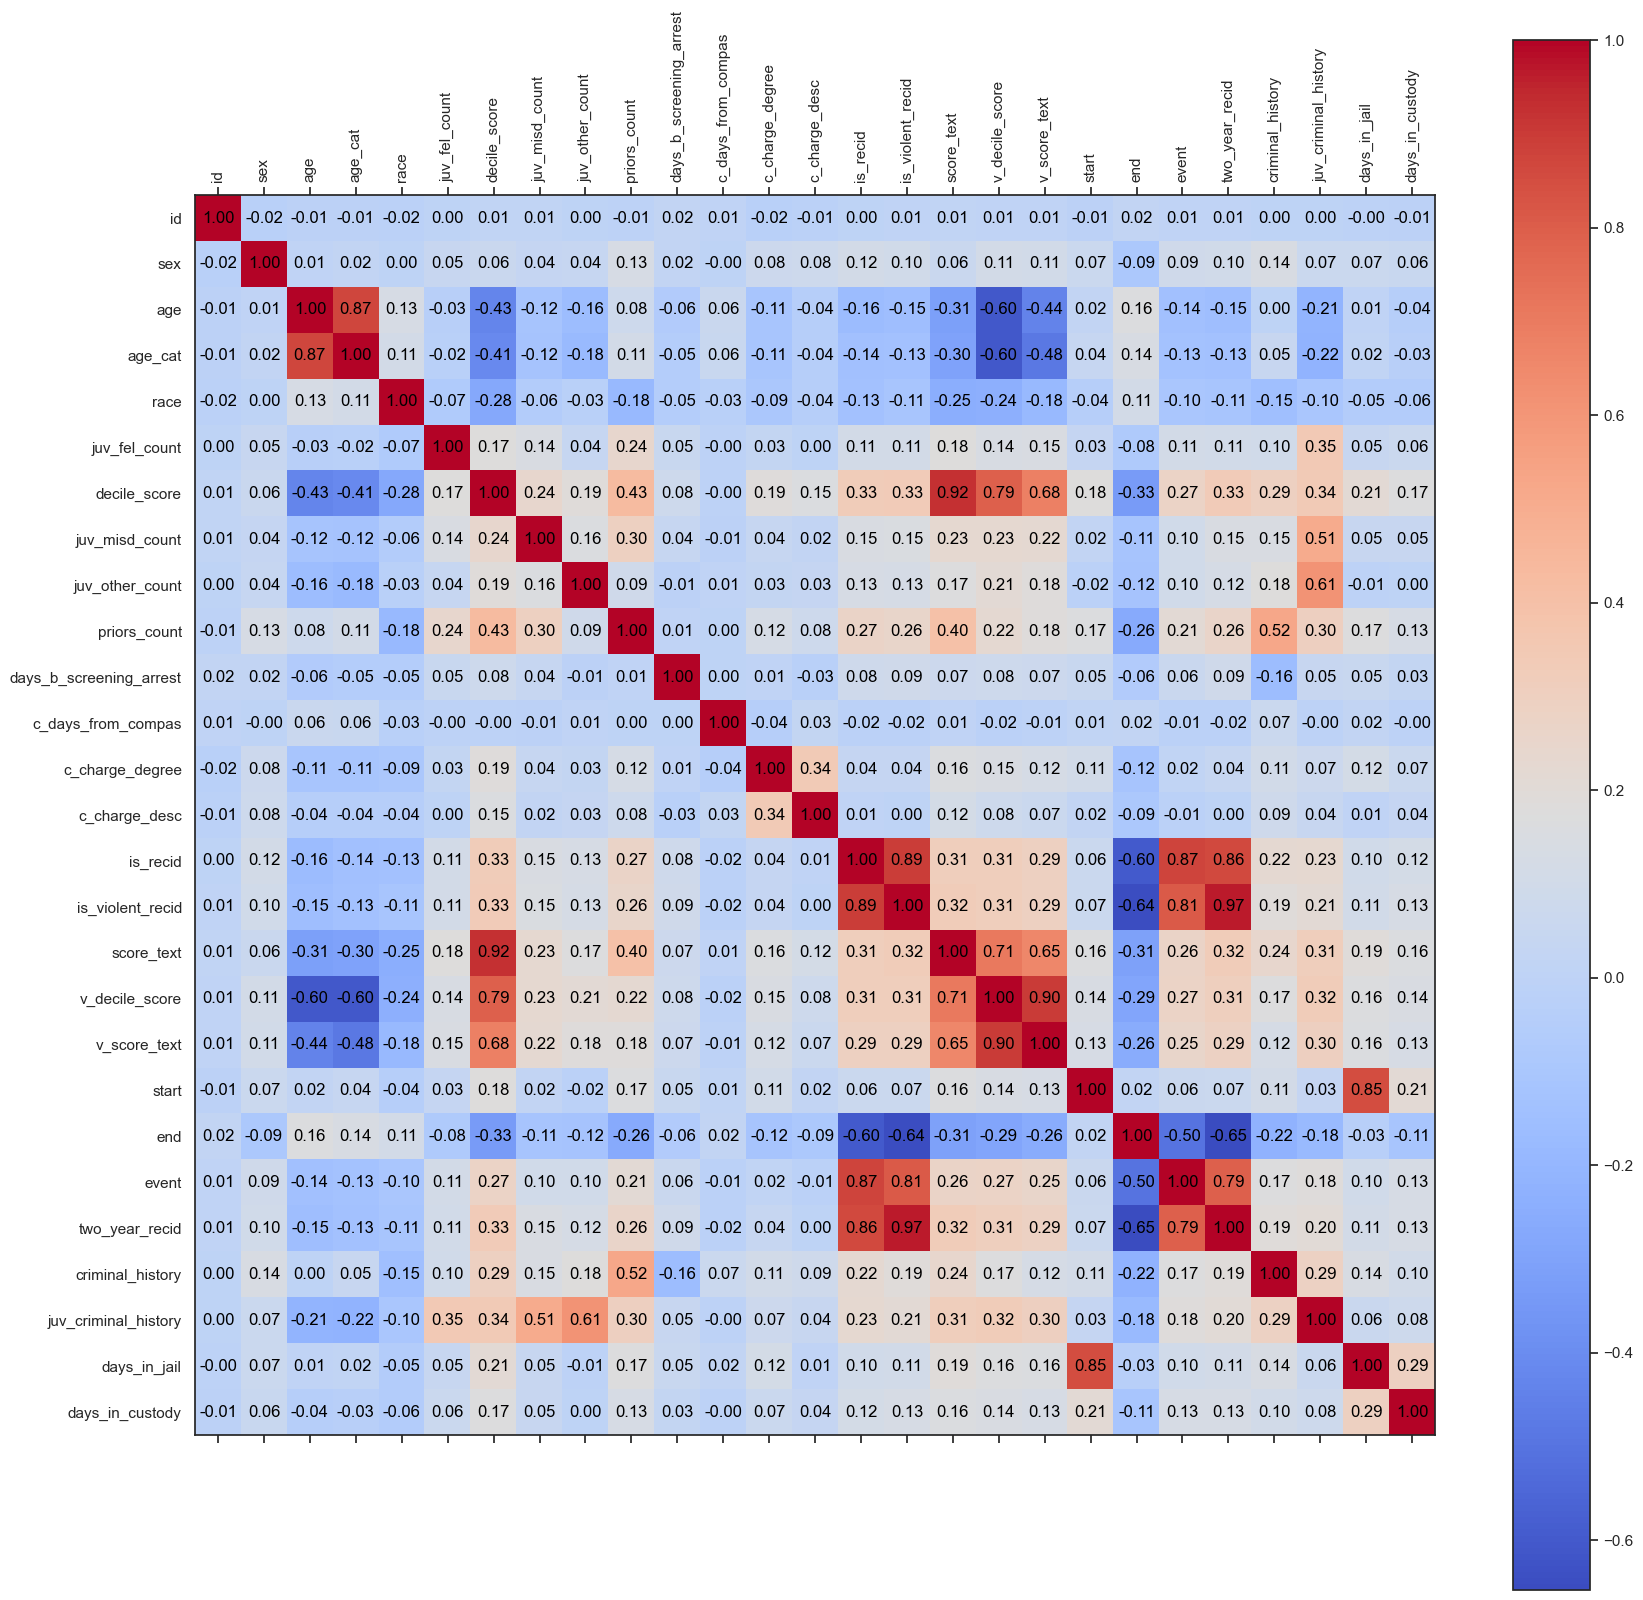

In [785]:
numerical_compas_df = compas_df.select_dtypes(include=['number'])
corr = numerical_compas_df.corr()

sns.set_theme(style="white")

plt.figure(figsize=(20, 20))
plt.matshow(corr, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
for (i, j), val in np.ndenumerate(corr):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.show()

In [786]:
print(compas_df.columns)

Index(['id', 'compas_screening_date', 'sex', 'dob', 'age', 'age_cat', 'race',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_offense_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'is_violent_recid', 'score_text',
       'v_decile_score', 'v_score_text', 'in_custody', 'out_custody', 'start',
       'end', 'event', 'two_year_recid', 'criminal_history',
       'juv_criminal_history', 'days_in_jail', 'days_in_custody'],
      dtype='object')


#### Select features

In [787]:
# select features: sex, age_cat, race, priors_count, c_charge_degree, decile_score, score_text, v_decile_score, v_score_text, criminal_history, juv_criminal_history, days_in_jail, days_in_custody
features = ['sex', 'age_cat', 'race', 
            'priors_count', 'c_charge_degree', 'decile_score', 
            'score_text', 'v_decile_score', 'v_score_text', 
            'criminal_history', 'juv_criminal_history', 'days_in_jail', 
            'days_in_custody', 'juv_fel_count',
            'juv_misd_count', 'juv_other_count',
            'two_year_recid']

compas_df = compas_df[features]

#### Feature importance
We use random forest to determine the importance of each feature in the dataset.

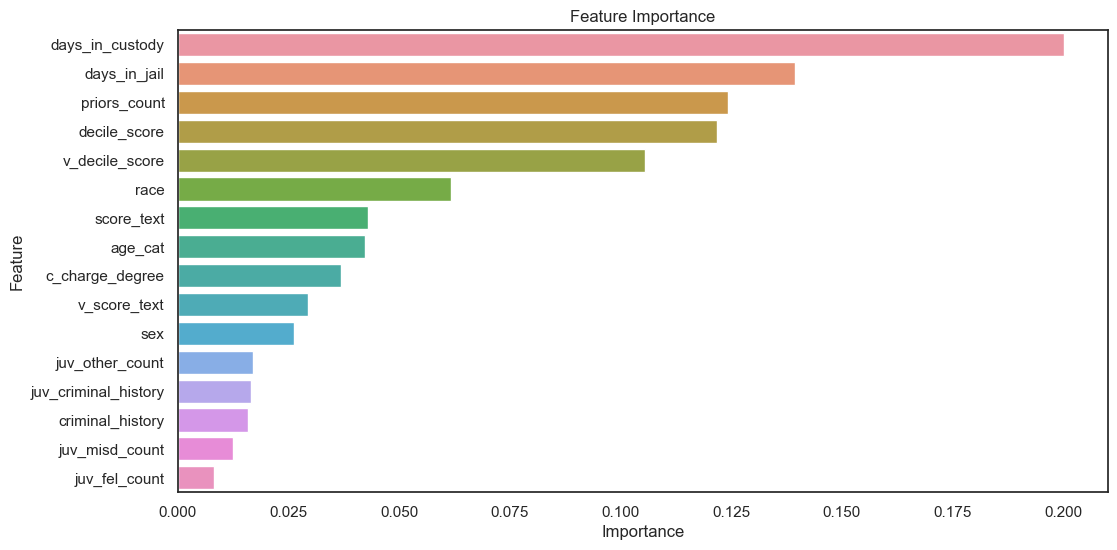

In [788]:
X = compas_df.drop('two_year_recid', axis=1)
y = compas_df['two_year_recid']

scaler = StandardScaler()
X = scaler.fit_transform(X)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = rf.feature_importances_
features = compas_df.columns[:-1]

feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [789]:
# drop features with importance less than 0.05
features_to_drop = feature_importances_df[feature_importances_df['Importance'] < 0.05]['Feature'].values
compas_df = compas_df.drop(features_to_drop, axis=1)

In [790]:
# split the data into training and testing sets
X = compas_df.drop('two_year_recid', axis=1)
y = compas_df['two_year_recid']

# scale the training
scaler = StandardScaler()
X = scaler.fit_transform(X)

<p style="color:#cc0066; font-size:30px;">Dimensionality Reduction</p>

Now we apply PCA to the dataset to reduce the number of feature.

In [791]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['two_year_recid'] = y.values 

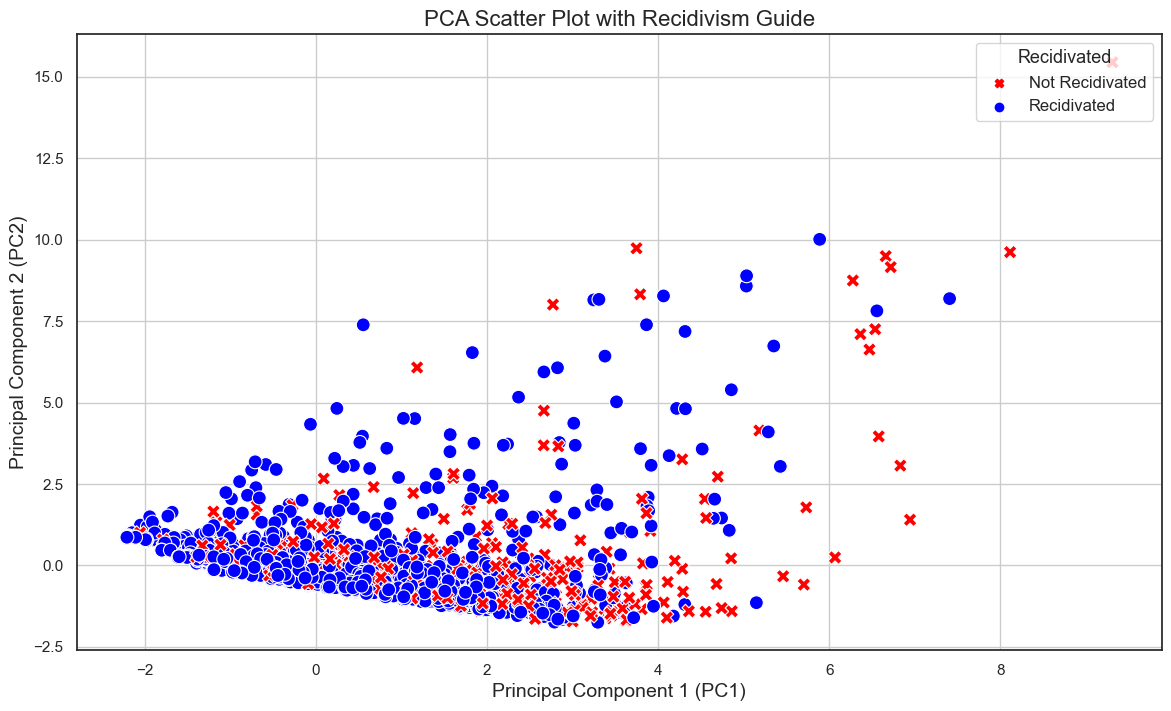

In [792]:
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='two_year_recid', 
    palette={0: 'blue', 1: 'red'}, 
    style='two_year_recid',
    markers={0: 'o', 1: 'X'}, 
    s=100
)

plt.title('PCA Scatter Plot with Recidivism Guide', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=14)
plt.ylabel('Principal Component 2 (PC2)', fontsize=14)

handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles=handles[1:] + handles[:1],
    labels=['Not Recidivated', 'Recidivated'],
    title='Recidivated',
    title_fontsize='13',
    loc='upper right',
    fontsize='12'
)

plt.grid(True)
plt.show()

We analyze the explained variance ratio (explained_variance_ratio_) to determine the number of components needed.

In [793]:
# The amount of variance explained by PC1 and PC2
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

# The total variance explained by PC1 and PC2
total_variance_explained = explained_variance_ratio.sum()
print(f"Total Variance Explained: {total_variance_explained}")



Explained Variance Ratio: [0.38534332 0.19143642]
Total Variance Explained: 0.5767797351370334


As we can see, about 57% of the variance is explained by 2 components.

To retain at least `95%` of the variance, we need to determine the number of components.

In [794]:
pca = PCA().fit(X)

cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

num_components_95 = (cumulative_explained_variance < 0.95).sum() + 1

print(f"Number of dimensions required to retain 95% of the variance: {num_components_95}")

print(f"Cumulative explained variance:\n {cumulative_explained_variance}")

Number of dimensions required to retain 95% of the variance: 5
Cumulative explained variance:
 [0.38534332 0.57677974 0.71976946 0.85339089 0.97057848 1.        ]


We can see that we need `5` components to retain at least `95%` of the variance.

In [795]:
pca = PCA(n_components=0.95)
X_pca_10 = pca.fit_transform(X)

print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_pca_10.shape}")

Original shape: (3490, 6)
Reduced shape: (3490, 5)


#### Save original data & dimensionality reduced data

In [796]:
# Save original data to a new CSV file
compas_df['two_year_recid'] = y.values
compas_df.to_csv("compas_original.csv", index=False)

# save dimension-reduced(2 dimensions) data to a new CSV file
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['two_year_recid'] = y.values
pca_df.to_csv("compas_pca.csv", index=False)

<p style="color:#cc0066; font-size:30px;">Evaluation Metric</p>

In [797]:
# print percentage of two_year_recid values
two_year_recid_percentage = compas_df['two_year_recid'].value_counts(normalize=True) * 100
print(f"Two Year Recidivism Percentage:\n{two_year_recid_percentage}")

Two Year Recidivism Percentage:
0    83.896848
1    16.103152
Name: two_year_recid, dtype: float64


Since our target feature is is binary, we will use `classification` as our evaluation metric and not regression.

And since our data is imbalanced, we will focus on the `percision`, `recall`, and `f1-score` metrics.

The reason for this is that the `accuracy` metric is not reliable for imbalanced data.

<p style="color:#cc0066; font-size:30px;">Model Training</p>

In [798]:
# define an array for each model to save it's accuracy, precision, recall, and f1-score. models are neural network, decision tree, linear regression, svm and knn
models = ['Neural Network', 'Decision Tree', 'Linear Regression', 'SVM', 'KNN']
model_accuracy = [0] * len(models)
model_precision = [0] * len(models)
model_recall = [0] * len(models)
model_f1_score = [0] * len(models)

#### Splitting the data

In [799]:
TEST_SIZE = 0.2
RANDOM_STATE = 42

In [800]:
# print percentage of two_year_recid values
two_year_recid_percentage = compas_df['two_year_recid'].value_counts(normalize=True) * 100
print(f"Two Year Recidivism Percentage:\n{two_year_recid_percentage}")

Two Year Recidivism Percentage:
0    83.896848
1    16.103152
Name: two_year_recid, dtype: float64


In [801]:
X = compas_df.drop('two_year_recid', axis=1)
y = compas_df['two_year_recid']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
# data is imbalanced and not_recid are far more than recid so we use stratify=y to ensure that the proportion of recid and not_recid is the same in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

<p style="color:cyan; font-size:24px;">Method One: Neural Network</p>

In [802]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

We use the following neural network architecture:
- 2 hidden layers with 64 and 32 neurons respectively.
- The activation function is `relu` for the hidden layers and `sigmoid` for the output layer. We used `sigmoid` because it is a binary classification problem.
- We use the `adam` optimizer and `binary_crossentropy` loss function.
- We train the model for 50 epochs.

In [803]:
def neural_network_train(X_train, y_train) -> Sequential:
		# Define the neural network architecture
		model = Sequential([
				Dense(64, input_dim=X_train.shape[1], activation='relu'),
				Dropout(0.5),
				Dense(32, activation='relu'),
				Dropout(0.5),
				Dense(16, activation='relu'),
				Dropout(0.5),
				Dense(1, activation='sigmoid')
		])

		# Compile the model
		model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

		# Train the model
		early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
		history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])

		return model, history

model, history = neural_network_train(X_train, y_train)


Epoch 1/50


C:\Users\Amir Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


70/70 [==============================] - 1s 3ms/step - loss: 2.3285 - accuracy: 0.6507 - val_loss: 0.7601 - val_accuracy: 0.7674
Epoch 2/50
70/70 [==============================] - 0s 2ms/step - loss: 1.7229 - accuracy: 0.7206 - val_loss: 0.6820 - val_accuracy: 0.8193
Epoch 3/50
70/70 [==============================] - 0s 2ms/step - loss: 1.1219 - accuracy: 0.7743 - val_loss: 0.6414 - val_accuracy: 0.8175
Epoch 4/50
70/70 [==============================] - 0s 2ms/step - loss: 1.1845 - accuracy: 0.7949 - val_loss: 0.6529 - val_accuracy: 0.8157
Epoch 5/50
70/70 [==============================] - 0s 2ms/step - loss: 0.9852 - accuracy: 0.8128 - val_loss: 0.5219 - val_accuracy: 0.8283
Epoch 6/50
70/70 [==============================] - 0s 2ms/step - loss: 0.8014 - accuracy: 0.8236 - val_loss: 0.4794 - val_accuracy: 0.8265
Epoch 7/50
70/70 [==============================] - 0s 2ms/step - loss: 0.7345 - accuracy: 0.8245 - val_loss: 0.4561 - val_accuracy: 0.8283
Epoch 8/50
70/70 [=============

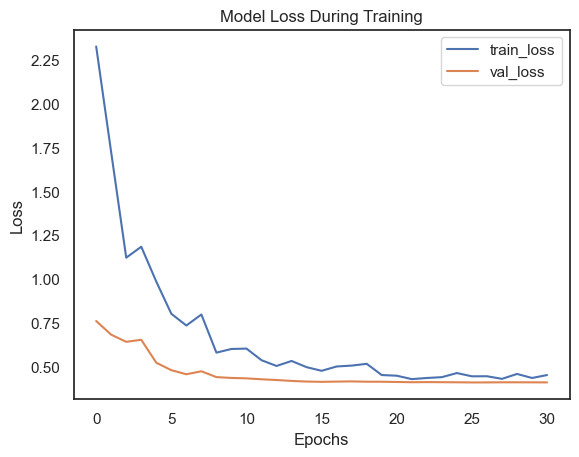

In [804]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Evaluate the Model

In [805]:
def evaluate_neural_network_model(model, X_test, y_test):
	# Evaluate the model
	loss, accuracy = model.evaluate(X_test, y_test)
	print(f"Loss: {loss:.4f}")
	print(f"Accuracy: {accuracy:.4f}")

	# Make predictions
	y_pred = model.predict(X_test)
	y_pred_classes = (y_pred > 0.5).astype(int)

	# Generate classification report
	classification_rep = classification_report(y_test, y_pred_classes, target_names=['Not Recidivated', 'Recidivated'])
	print(f"Classification Report:\n{classification_rep}")

	# Generate confusion matrix
	conf_matrix = confusion_matrix(y_test, y_pred_classes)
	conf_matrix_df = pd.DataFrame(conf_matrix, index=['Not Recidivated', 'Recidivated'], columns=['Not Recidivated', 'Recidivated'])
	print(f"Confusion Matrix:\n{conf_matrix_df}")

	return y_pred_classes, accuracy

In [806]:
print("Model Evaluation For Neural Network:\n")
y_pred_classes,accuracy = evaluate_neural_network_model(model, X_test, y_test)

Model Evaluation For Neural Network:

22/22 [==============================] - 0s 857us/step - loss: 0.3824 - accuracy: 0.8395
Loss: 0.3824
Accuracy: 0.8395
22/22 [==============================] - 0s 762us/step
Classification Report:
                 precision    recall  f1-score   support

Not Recidivated       0.84      1.00      0.91       586
    Recidivated       0.00      0.00      0.00       112

       accuracy                           0.84       698
      macro avg       0.42      0.50      0.46       698
   weighted avg       0.70      0.84      0.77       698

Confusion Matrix:
                 Not Recidivated  Recidivated
Not Recidivated              586            0
Recidivated                  112            0


C:\Users\Amir Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amir Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amir Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1

In [807]:
# add to model
model_accuracy[0] = accuracy
model_precision[0] = precision_score(y_test, y_pred_classes)
model_recall[0] = recall_score(y_test, y_pred_classes)
model_f1_score[0] = f1_score(y_test, y_pred_classes)

C:\Users\Amir Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


while the model performs well in predicting "Not Recidivated" cases with high precision and recall, it struggles significantly with "Recidivated" cases, resulting in low recall and F1-score for that class. 

**We may need to prioritize either precision or recall more based on the consequences of false positives (predicting someone will recidivate when they do not) versus false negatives (failing to predict recidivism when it does occur).**

<p style="color:cyan; font-size:24px;">Method Two: Decision Tree</p>

In [808]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

In [809]:
def decision_tree_train(X_train, y_train) -> DecisionTreeClassifier:
    
	model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

	model.fit(X_train, y_train)
  
	return model

model = decision_tree_train(X_train, y_train)

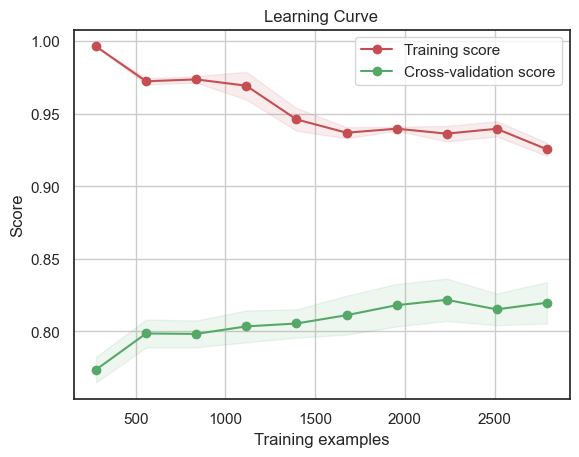

In [810]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation for plotting
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the average training and test score lines at each training size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

#### Evaluate the Model

In [811]:
def evaluate_decision_tree_model(model, X_test, y_test):
		accuracy = model.score(X_test, y_test)
		print(f"Accuracy: {accuracy:.4f}")

		y_pred = model.predict(X_test)

		classification_rep = classification_report(y_test, y_pred, target_names=['Not Recidivated', 'Recidivated'])
		print(f"Classification Report:\n{classification_rep}")

		conf_matrix = confusion_matrix(y_test, y_pred)
		conf_matrix_df = pd.DataFrame(conf_matrix, index=['Not Recidivated', 'Recidivated'], columns=['Not Recidivated', 'Recidivated'])
		print(f"Confusion Matrix:\n{conf_matrix_df}")

		return accuracy, y_pred
		


print("Model Evaluation For Decision Tree:\n")

accuracy, y_pred = evaluate_decision_tree_model(model, X_test, y_test)

Model Evaluation For Decision Tree:

Accuracy: 0.8238
Classification Report:
                 precision    recall  f1-score   support

Not Recidivated       0.88      0.91      0.90       586
    Recidivated       0.44      0.36      0.39       112

       accuracy                           0.82       698
      macro avg       0.66      0.64      0.65       698
   weighted avg       0.81      0.82      0.82       698

Confusion Matrix:
                 Not Recidivated  Recidivated
Not Recidivated              535           51
Recidivated                   72           40


As we can see, the decision tree model performs well in predicting "Not Recidivated" cases with high precision and recall, but as we have faced in the neural network model, it also struggles significantly with "Recidivated" cases, resulting in low recall and F1-score for that class.

But the decision tree model is better than the neural network model in predicting "Recidivated" cases.

#### Model Hyperparameters

In [812]:
print(f"Model hyperparameters: \n{model.get_params()}")

Model hyperparameters: 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


For the decision tree model, we will use the following hyperparameters:
- max_depth = `10` -> the reason why the max_depth is set to 10 is to prevent overfitting.
- min_samples_split = `2` -> that is because the dataset is small.
- min_samples_leaf = `1` -> that is because the dataset is small.
- criteria = `gini` -> that is because it is a binary classification problem.

In [813]:
# save the model parameters
model_accuracy[1] = accuracy
model_precision[1] = precision_score(y_test, y_pred)
model_recall[1] = recall_score(y_test, y_pred)
model_f1_score[1] = f1_score(y_test, y_pred)

To select the next training method, we will look at what each method is good at and what it is not good at.
<p style="color:blue; font-size:26px;">Model Overview</p>

* `Logistic Regression`: Simple, interpretable, but may struggle with complex relationships.
* `Support Vector Machine (SVM)`: Effective in high-dimensional spaces, but can be slow with large datasets. Using class_weight='balanced' can help with imbalance.
* `K-Nearest Neighbors (KNN)`: Simple and intuitive, but can be computationally expensive and may not perform well with imbalanced data.

In [814]:
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = model.score(X_test, y_test)
    
    report = classification_report(y_test, y_pred, target_names=['Not Recidivated', 'Recidivated'])
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Not Recidivated', 'Recidivated'], columns=['Not Recidivated', 'Recidivated'])
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{conf_matrix_df}")
    print()
    
    return accuracy, y_pred

In [815]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [816]:

def knn_error_plot(n_neighbors, X_train, y_train, X_test, y_test, epochs=20):
    train_errors = []
    test_errors = []
    
    for epoch in range(1, epochs + 1):
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn_model.fit(X_train, y_train)
        
        y_train_pred = knn_model.predict(X_train)
        y_test_pred = knn_model.predict(X_test)
        
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        
        train_errors.append(train_error)
        test_errors.append(test_error)
        
    plt.plot(range(1, epochs + 1), train_errors, label='Training Error')
    plt.plot(range(1, epochs + 1), test_errors, label='Testing Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('K-Nearest Neighbors Training Error Plot')
    plt.legend()
    plt.show()
     

<p style="color:cyan; font-size:24px;">Method Three: Logistic Regression</p>

In [817]:
from sklearn.linear_model import LogisticRegression

In [818]:
def plot_errors(train_errors, test_errors, model_name):
    epochs = len(train_errors)
    plt.plot(range(1, epochs + 1), train_errors, label='Training Error')
    plt.plot(range(1, epochs + 1), test_errors, label='Testing Error')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title(f'{model_name} Training Error Plot')
    plt.legend()
    plt.show()


In [819]:
def logistic_regression_train(X_train, y_train) -> LogisticRegression:
	model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
	model.fit(X_train, y_train)
	
	return model

model = logistic_regression_train(X_train, y_train)

accuracy, y_pred = evaluate_model(model, 'Logistic Regression')

Model: Logistic Regression
Accuracy: 0.7292
Classification Report:
                 precision    recall  f1-score   support

Not Recidivated       0.93      0.74      0.82       586
    Recidivated       0.33      0.70      0.45       112

       accuracy                           0.73       698
      macro avg       0.63      0.72      0.64       698
   weighted avg       0.83      0.73      0.76       698

Confusion Matrix:
                 Not Recidivated  Recidivated
Not Recidivated              431          155
Recidivated                   34           78



As we can see, the logistic regression model performs better than the neural network and decision tree models in predicting "Recidivated" cases, but overall, since the the result especially in predicting "Not Recidivated" cases are important and this model is not good in predicting this class, we will not use it.

**NOTE:** If we want to have an error plot, we need to use `SGDClassifier` beccause it is the only model that has the `partial_fit` method that allows us to plot the error. But because `LogisticRegression` library gives us better results, we will not use `SGDClassifier`.

In [820]:
# save the model parameters
model_accuracy[2] = accuracy
model_precision[2] = precision_score(y_test, y_pred)
model_recall[2] = recall_score(y_test, y_pred)
model_f1_score[2] = f1_score(y_test, y_pred)

<p style="color:cyan; font-size:24px;">Method Four: Support Vector Machine (SVM)</p>

In [821]:
from sklearn.svm import SVC

In [822]:
def plot_errors_svm(train_errors, test_errors, model_name):
	epochs = len(train_errors)
	plt.plot(range(1, epochs + 1), train_errors, label='Training Error')
	plt.plot(range(1, epochs + 1), test_errors, label='Testing Error')
	plt.xlabel('Epochs')
	plt.ylabel('Error')
	plt.title(f'{model_name} Training Error Plot')
	plt.legend()
	plt.show()

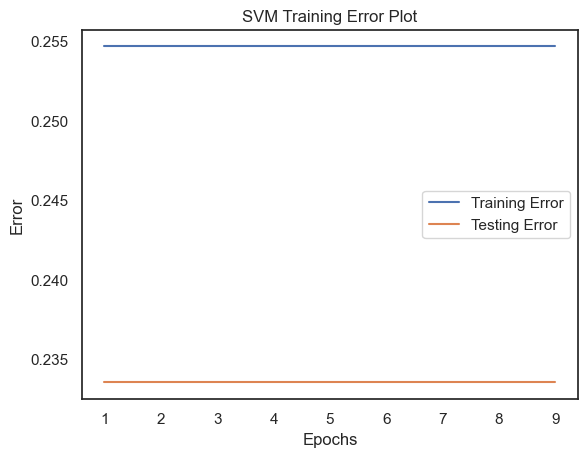

Model: SVM
Accuracy: 0.7665
Classification Report:
                 precision    recall  f1-score   support

Not Recidivated       0.93      0.78      0.85       586
    Recidivated       0.38      0.70      0.49       112

       accuracy                           0.77       698
      macro avg       0.65      0.74      0.67       698
   weighted avg       0.84      0.77      0.79       698

Confusion Matrix:
                 Not Recidivated  Recidivated
Not Recidivated              457          129
Recidivated                   34           78



In [823]:
def svm_train(X_train, y_train) -> SVC:
	model = SVC(kernel='linear', class_weight='balanced', random_state=42)
	model.fit(X_train, y_train)
	
	return model

# model = svm_train(X_train, y_train)

# plotting the errors
train_errors = []
test_errors = []

for epoch in range(1, 10):
	model = svm_train(X_train, y_train)
	
	train_errors.append(1 - model.score(X_train, y_train))
	test_errors.append(1 - model.score(X_test, y_test))
 
plot_errors_svm(train_errors, test_errors, 'SVM')

accuracy, y_pred = evaluate_model(model, 'SVM')

As we can see, the SVM model is very similar to the logistic regression model in terms of performance.

In [824]:
# add model parameters to the model
model_accuracy[3] = accuracy
model_precision[3] = precision_score(y_test, y_pred)
model_recall[3] = recall_score(y_test, y_pred)
model_f1_score[3] = f1_score(y_test, y_pred)

<p style="color:cyan; font-size:24px;">Method Five: K-Nearest Neighbors (KNN)</p>

In [825]:
from sklearn.neighbors import KNeighborsClassifier

In [826]:
def plot_errors_knn(train_errors, test_errors, model_name):
	epochs = len(train_errors)
	plt.plot(range(1, epochs + 1), train_errors, label='Training Error')
	plt.plot(range(1, epochs + 1), test_errors, label='Testing Error')
	plt.xlabel('Epochs')
	plt.ylabel('Error')
	plt.title(f'{model_name} Training Error Plot')
	plt.legend()
	plt.show()

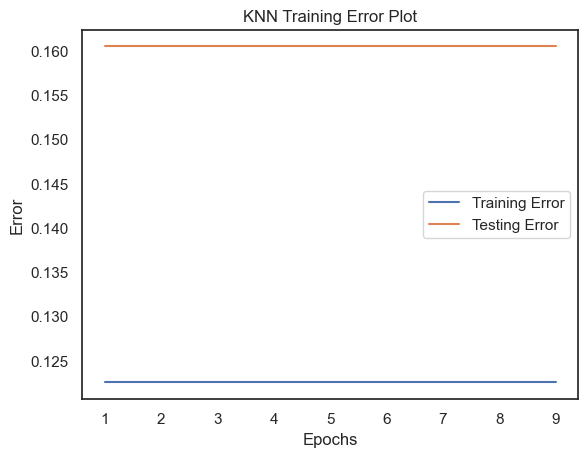

Model: KNN
Accuracy: 0.8395
Classification Report:
                 precision    recall  f1-score   support

Not Recidivated       0.86      0.96      0.91       586
    Recidivated       0.50      0.19      0.27       112

       accuracy                           0.84       698
      macro avg       0.68      0.58      0.59       698
   weighted avg       0.80      0.84      0.81       698

Confusion Matrix:
                 Not Recidivated  Recidivated
Not Recidivated              565           21
Recidivated                   91           21



In [827]:
def knn_train(X_train, y_train) -> KNeighborsClassifier:
	model = KNeighborsClassifier(n_neighbors=5)
	model.fit(X_train, y_train)
	
	return model

model = knn_train(X_train, y_train)

# plotting the errors
train_errors = []
test_errors = []

for epoch in range(1, 10):
	model = knn_train(X_train, y_train)
	
	train_errors.append(1 - model.score(X_train, y_train))
	test_errors.append(1 - model.score(X_test, y_test))

plot_errors_knn(train_errors, test_errors, 'KNN')
 
accuracy, y_pred = evaluate_model(model, 'KNN')

The results are good for predicting "Not Recidivated" cases, but the model struggles with "Recidivated" cases.

In [828]:
# add model to the model parameters
model_accuracy[4] = accuracy
model_precision[4] = precision_score(y_test, y_pred)
model_recall[4] = recall_score(y_test, y_pred)
model_f1_score[4] = f1_score(y_test, y_pred)

## Comparison of Models

In [829]:
# create a table using models and their accuracy, precision, recall, and f1-score values
model_metrics = pd.DataFrame({
		'Model': models,
		'Accuracy': model_accuracy,
		'Precision': model_precision,
		'Recall': model_recall,
		'F1-Score': model_f1_score
})

display(model_metrics)

,Model,Accuracy,Precision,Recall,F1-Score
0,Neural Network,0.839542,0.000000,0.000000,0.000000
1,Decision Tree,0.823782,0.439560,0.357143,0.394089
2,Linear Regression,0.729226,0.334764,0.696429,0.452174
3,SVM,0.766476,0.376812,0.696429,0.489028
4,KNN,0.839542,0.500000,0.187500,0.272727


`Recall` and `Percision` are the most important metrics for this dataset. `Recall` is important because it shows how many of the actual recidivists the model can predict correctly. `Percision` is important because it shows how many of the predicted recidivists are actually recidivists. 

Since our choice on not to convict an innocent person is more important than our choice on not to release a guilty person, we will focus on `percision` more than `recall`.

In [832]:
# sort the table by recall
model_metrics = model_metrics.sort_values(by='Precision', ascending=False)
display(model_metrics)

,Model,Accuracy,Precision,Recall,F1-Score
4,KNN,0.839542,0.500000,0.187500,0.272727
1,Decision Tree,0.823782,0.439560,0.357143,0.394089
3,SVM,0.766476,0.376812,0.696429,0.489028
2,Linear Regression,0.729226,0.334764,0.696429,0.452174
0,Neural Network,0.839542,0.000000,0.000000,0.000000


Based on the results, the `Decision Tree` model is the best model for this dataset.

<p style="color:#cc0066; font-size:30px;">Feature Analysis</p>

Now we train our pca dataset that we saved earlier.

#### Load the dataset

In [833]:
compas_pca_df = pd.read_csv("compas_pca.csv")

X = compas_pca_df.drop('two_year_recid', axis=1)
y = compas_pca_df['two_year_recid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

#### Train the model using Decision Tree

In [836]:
# train using decision tree
model = decision_tree_train(X_train, y_train)

accuracy, y_pred = evaluate_decision_tree_model(model, X_test, y_test)

pca_accuracy = accuracy
pca_precision = precision_score(y_test, y_pred)
pca_recall = recall_score(y_test, y_pred)
pca_f1_score = f1_score(y_test, y_pred)

Accuracy: 0.8324
Classification Report:
                 precision    recall  f1-score   support

Not Recidivated       0.87      0.95      0.90       586
    Recidivated       0.46      0.23      0.31       112

       accuracy                           0.83       698
      macro avg       0.66      0.59      0.61       698
   weighted avg       0.80      0.83      0.81       698

Confusion Matrix:
                 Not Recidivated  Recidivated
Not Recidivated              555           31
Recidivated                   86           26


### Compare PCA and Original Data Training

In [837]:
# compare the results with the original model
model_metrics = model_metrics.append({
		'Model': 'PCA Decision Tree',
		'Accuracy': pca_accuracy,
		'Precision': pca_precision,
		'Recall': pca_recall,
		'F1-Score': pca_f1_score
}, ignore_index=True)

model_metrics = model_metrics.sort_values(by='Precision', ascending=False)
display(model_metrics)

C:\Users\Amir Ali\AppData\Local\Temp\ipykernel_18744\4236140201.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_metrics = model_metrics.append({


,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.839542,0.500000,0.187500,0.272727
5,PCA Decision Tree,0.832378,0.456140,0.232143,0.307692
1,Decision Tree,0.823782,0.439560,0.357143,0.394089
2,SVM,0.766476,0.376812,0.696429,0.489028
3,Linear Regression,0.729226,0.334764,0.696429,0.452174
4,Neural Network,0.839542,0.000000,0.000000,0.000000


As we can see, the model trained on the original data performs better than the model trained on the PCA data on `Recall` and `F1-score`. But the model trained on the PCA data performs better on `Percision`.

<p style="color:#cc0066; font-size:30px;">Overall Report and Discussions</p>

### Phase 0: Selecting the Dataset
The dataset we selected is the "Compas Analysis" dataset. The dataset contains information about criminal defendants and their risk assessment scores. The dataset contains `4743` rows and `54` columns and is available on this [link](https://huggingface.co/datasets/mstz/compas).

The dataset contains:
- number of **categorical** columns: `33`
- number of **numerical** columns: `21`

The target feature we chose is `two_year_recid` which is a binary feature that indicates whether the defendant was recidivated within two years.

### Phase 1: Data Analysis
In this phase, we analyzed and preprocessed the dataset to understand its structure and the relationships between its features. We also do the EDA to understand the data better.


### Phase 2: Training the Dataset
In this phase, we did the following steps:
- **Preprocessing**: Like what we did in the previous phase but did some additional steps.
- **Feature Engineering and Selection**: We added some features and removed some features that are not relevant to the model.
- **Dimensionality Reduction**: We applied PCA to the dataset to reduce the number of features.
- **Model Training**: We trained the dataset using different models like Neural Network, Decision Tree, Logistic Regression, SVM, and KNN.
- **Model Evaluation**: We evaluated the models using different metrics like `precision`, `recall`, and `f1-score`.

## Conclusion
Based on the model results, it is evident that while the models perform well in predicting "Not Recidivated" cases, they significantly struggle with predicting "Recidivated" cases. Among the models tested, the Decision Tree model shows the best performance for this dataset. This discrepancy is a common issue in imbalanced datasets, where the majority class is predicted more accurately than the minority class.

Given the high stakes involved in making decisions about individuals based on these predictions, it is crucial to exercise extreme caution when using this model in real-life scenarios. The potential consequences of incorrect predictions are too significant to rely solely on this model without substantial improvements or additional safeguards. **Therefore, we recommend against using this prediction model in its current form for making real-life decisions.**

## Resources
- https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing
- https://github.com/propublica/compas-analysis
- https://huggingface.co/datasets/mstz/compas